# 世界モデルの内部表現の可視化

DreamerV3の学習ログ（`metrics.jsonl`）を読み込んで、確率的状態（stoch）の使われ方がどう変化するかを可視化します。

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import japanize_matplotlib

# ログファイルのパス
LOG_DIR = Path("../log/2512261724_dreamerV3_atari100k_ms_pacman")
METRICS_PATH = LOG_DIR / "metrics.jsonl"

print(f"Reading: {METRICS_PATH}")

Reading: ../log/2512261724_dreamerV3_atari100k_ms_pacman/metrics.jsonl


In [2]:
# JSONL を読み込み
records = []
with open(METRICS_PATH, "r") as f:
    for line in f:
        records.append(json.loads(line))

df = pd.DataFrame(records)
print(f"Loaded {len(df)} records")
print(f"Available columns: {list(df.columns)[:20]}...")
df.head()

Loaded 229 records
Available columns: ['step', 'episode/score', 'episode/length', 'dormant/actor_all', 'dormant/actor_layer0', 'dormant/actor_layer1', 'dormant/actor_layer2', 'dormant/critic_all', 'dormant/critic_layer0', 'dormant/critic_layer1', 'dormant/critic_layer2', 'dormant/world_all', 'dormant/world_con_layer0', 'dormant/world_dec_img', 'dormant/world_deter', 'dormant/world_penultimate', 'dormant/world_rew_layer0', 'dormant/world_stoch', 'dormant/world_tokens', 'train/adv']...


,step,episode/score,episode/length,dormant/actor_all,dormant/actor_layer0,dormant/actor_layer1,dormant/actor_layer2,dormant/critic_all,dormant/critic_layer0,dormant/critic_layer1,...,usage/psutil/total_ram_used_gb,usage/psutil/total_ram_avail_gb,usage/nvsmi/compute_min/gpu0,usage/nvsmi/compute_avg/gpu0,usage/nvsmi/compute_max/gpu0,usage/nvsmi/memory_min/gpu0,usage/nvsmi/memory_avg/gpu0,usage/nvsmi/memory_max/gpu0,fps/policy,fps/train
0,2728,350.0,682.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4388,200.0,415.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5992,170.0,401.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7452,190.0,365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8160,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,101.059174,18.638367,0.0,0.66,0.96,0.0,0.0,0.0,15.383709,926.642166


In [3]:
# 学習メトリクスのみ抽出（dormant/world_stoch が存在する行 = レポート行）
df_train = df[df["dormant/world_stoch"].notna()].copy()
print(f"Training report records: {len(df_train)}")
df_train.head()

Training report records: 86


,step,episode/score,episode/length,dormant/actor_all,dormant/actor_layer0,dormant/actor_layer1,dormant/actor_layer2,dormant/critic_all,dormant/critic_layer0,dormant/critic_layer1,...,usage/psutil/total_ram_used_gb,usage/psutil/total_ram_avail_gb,usage/nvsmi/compute_min/gpu0,usage/nvsmi/compute_avg/gpu0,usage/nvsmi/compute_max/gpu0,usage/nvsmi/memory_min/gpu0,usage/nvsmi/memory_avg/gpu0,usage/nvsmi/memory_max/gpu0,fps/policy,fps/train
4,8160,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,101.059174,18.638367,0.00,0.66,0.96,0.0,0.0,0.0,15.383709,926.642166
7,12120,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.001302,0.000000,0.000977,...,100.779976,18.917564,0.84,0.93,0.96,0.0,0.0,0.0,8.236172,1047.840699
10,16160,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.013021,0.008789,0.019531,...,100.523544,19.173996,0.83,0.93,0.96,0.0,0.0,0.0,8.289821,1067.400609
12,20160,NaN,NaN,0.005859,0.0,0.000977,0.016602,0.010742,0.012695,0.012695,...,100.523731,19.173809,0.84,0.93,0.96,0.0,0.0,0.0,8.281220,1059.996094
16,24200,NaN,NaN,0.002930,0.0,0.002930,0.008789,0.012044,0.008789,0.012695,...,100.511436,19.186104,0.77,0.92,0.96,0.0,0.0,0.0,8.372981,1069.619337


## 1. dormant/world_stoch（休眠率）の推移

確率的潜在状態1024次元のうち、ほとんど使われていないニューロンの割合。

- **低い値**（例: 0.1 = 10%）: 多くのニューロンが有効活用されている
- **高い値**（例: 0.9 = 90%）: 表現が冗長で、モード崩壊の可能性あり

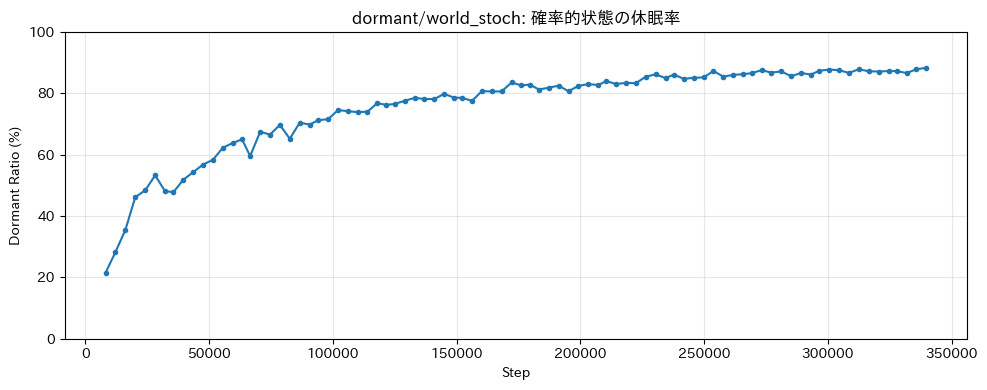

In [4]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df_train["step"], df_train["dormant/world_stoch"] * 100, marker="o", markersize=3)
ax.set_xlabel("Step")
ax.set_ylabel("Dormant Ratio (%)")
ax.set_title("dormant/world_stoch: 確率的状態の休眠率")
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 100)
plt.tight_layout()
plt.show()

## 2. train/dyn_ent（ダイナミクス・エントロピー）の推移

**Prior（事前分布）の不確実性**。観測なしに「次に何が起こるか」を予測する際の迷いの大きさ。

- **高い値**: 予測が不確実（ランダム）
- **低い値**: 予測に自信がある（学習が進んでいる）

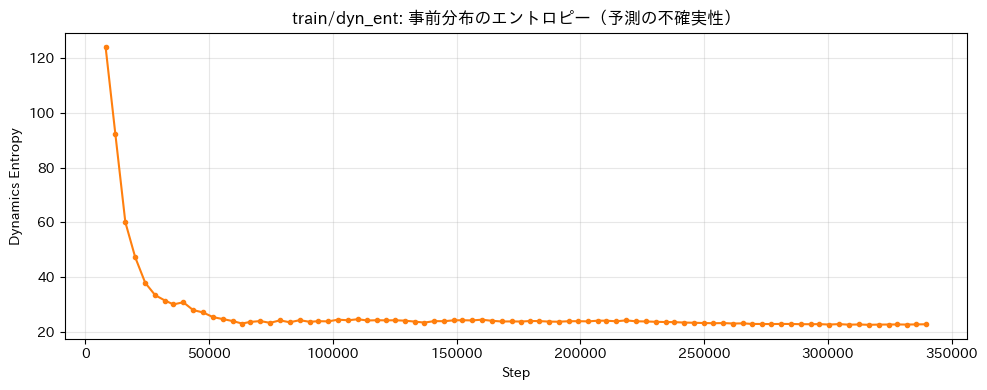

In [5]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df_train["step"], df_train["train/dyn_ent"], marker="o", markersize=3, color="tab:orange")
ax.set_xlabel("Step")
ax.set_ylabel("Dynamics Entropy")
ax.set_title("train/dyn_ent: 事前分布のエントロピー（予測の不確実性）")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 3. train/rep_ent（表現・エントロピー）の推移

**Posterior（事後分布）の不確実性**。現在の画像を見て「今どんな状態か」を認識する際の鮮明さ。

- **高い値**: 認識がぼんやりしている
- **低い値**: 認識が鮮明

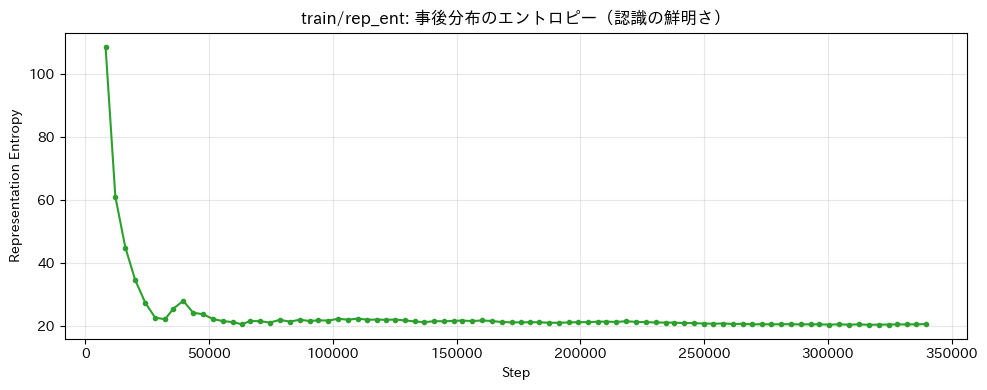

In [6]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df_train["step"], df_train["train/rep_ent"], marker="o", markersize=3, color="tab:green")
ax.set_xlabel("Step")
ax.set_ylabel("Representation Entropy")
ax.set_title("train/rep_ent: 事後分布のエントロピー（認識の鮮明さ）")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. 3つのメトリクスを並べて比較

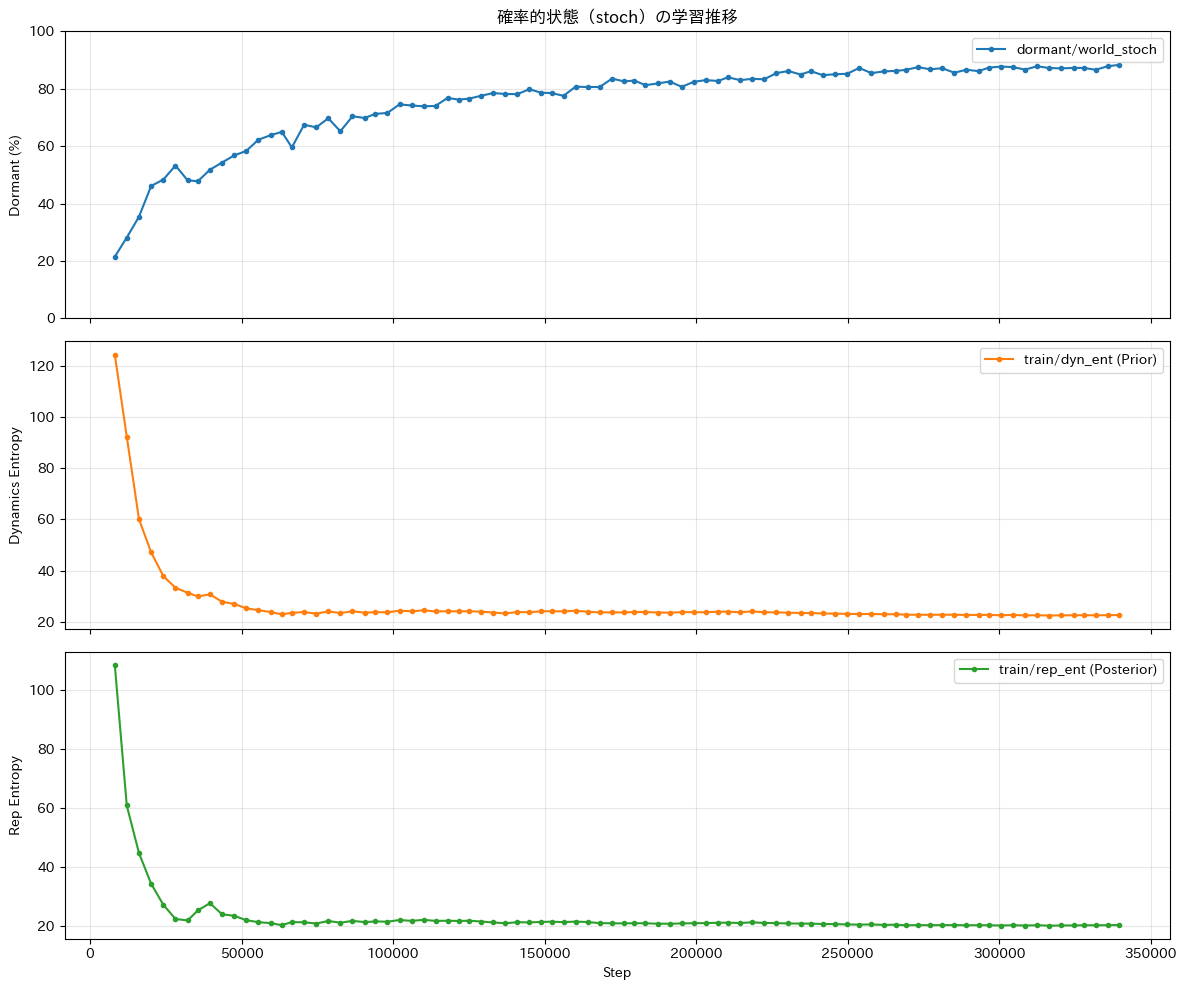

In [7]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Dormant Ratio
axes[0].plot(df_train["step"], df_train["dormant/world_stoch"] * 100, marker=".", color="tab:blue")
axes[0].set_ylabel("Dormant (%)")
axes[0].set_title("確率的状態（stoch）の学習推移")
axes[0].legend(["dormant/world_stoch"], loc="upper right")
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(0, 100)

# Dynamics Entropy
axes[1].plot(df_train["step"], df_train["train/dyn_ent"], marker=".", color="tab:orange")
axes[1].set_ylabel("Dynamics Entropy")
axes[1].legend(["train/dyn_ent (Prior)"], loc="upper right")
axes[1].grid(True, alpha=0.3)

# Representation Entropy
axes[2].plot(df_train["step"], df_train["train/rep_ent"], marker=".", color="tab:green")
axes[2].set_ylabel("Rep Entropy")
axes[2].set_xlabel("Step")
axes[2].legend(["train/rep_ent (Posterior)"], loc="upper right")
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. エピソードスコアとの関連

Episode records: 143


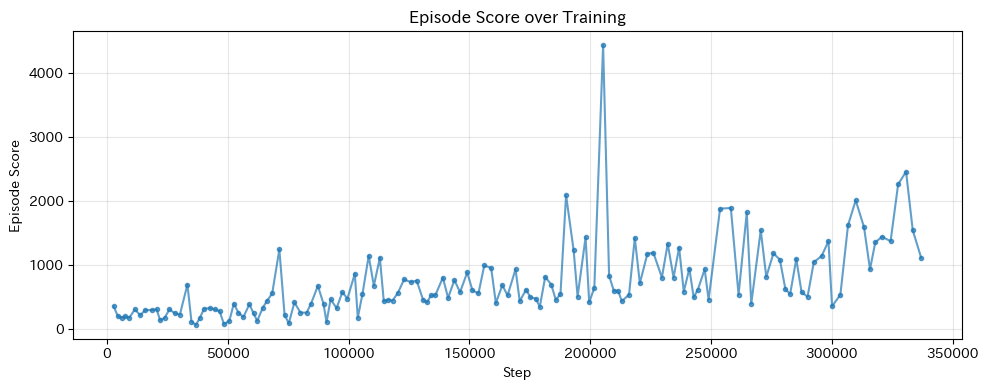

In [8]:
df_episode = df[df["episode/score"].notna()].copy()
print(f"Episode records: {len(df_episode)}")

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df_episode["step"], df_episode["episode/score"], marker="o", markersize=3, alpha=0.7)
ax.set_xlabel("Step")
ax.set_ylabel("Episode Score")
ax.set_title("Episode Score over Training")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()